#    一、我感兴趣的一些问题

##        什么因素能影响船上人的生还率？
###        1.生还者与未生还者的年龄分布情况
###        2.船票等级对生还率的影响
###        3.生还者与未生还者的性别差异

#    二、数据处理

In [83]:
import numpy as np
import pandas as pd

In [84]:
titanic = pd.read_csv('titanic-data.csv')

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#    三、数据分析

##    1.探究年龄能否影响泰坦尼克号生还情况

In [104]:
def get_describe(data):
    return data.describe()

In [105]:
#生还者的年龄分布情况(忽略空值)
survived_age = titanic.groupby(['Survived','PassengerId'])['Age'].sum().loc[1]
get_describe(survived_age)

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [106]:
#未生还者的年龄分布情况（忽略空值）
unsurvived_age = titanic.groupby(['Survived','PassengerId'])['Age'].sum().loc[0]
get_describe(unsurvived_age)

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

Populating the interactive namespace from numpy and matplotlib


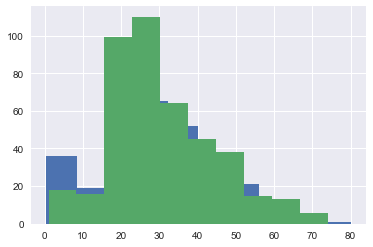

In [90]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

survived_age.hist()
unsurvived_age.hist()

### 结论1: 未生还者相对生还者平均年龄更大

##    2.探究船票与生还率的关系

In [107]:
#未生还者的船票分布情况
unsurvived_fare = titanic.groupby(['Survived','PassengerId'])['Fare'].sum().loc[0]
get_describe(unsurvived_fare)

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [108]:
#生还者的船票分布情况
survived_fare = titanic.groupby(['Survived','PassengerId'])['Fare'].sum().loc[1]
get_describe(survived_fare)

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

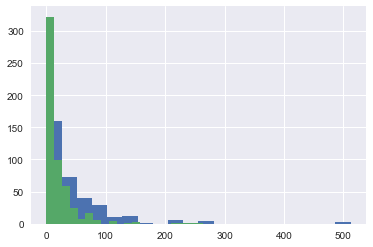

In [93]:
survived_fare.hist(bins=20)
unsurvived_fare.hist(bins=20)

In [94]:
#探究不同船票等级对生还率的影响
##以船票等级、生还情况分组，计算乘客数量
passenger_by_pcalss = titanic.groupby(['Pclass','Survived'])['PassengerId'].count()

In [95]:
for i in range(1,4):
    print 'Pclass' + str(i) +' survived_rate:'  + str(float(passenger_by_pcalss.loc[i,1]) / passenger_by_pcalss.loc[i].sum())

Pclass1 survived_rate:0.62962962963
Pclass2 survived_rate:0.472826086957
Pclass3 survived_rate:0.242362525458


### 结论2: 船票对生还率有影响，未生还者更多是下等舱的旅客，船票等级越高，生还率越高。

##    3.探究性别与生还率的关系

In [98]:
#以性别、生还情况分组，计算乘客数量
passenger_by_sex = titanic.groupby(['Sex','Survived'])['PassengerId'].count()

In [100]:
for i in ('male','female'):
    print i +' survived_rate:'  + str(float(passenger_by_sex.loc[i,1]) / passenger_by_sex.loc[i].sum())

male survived_rate:0.188908145581
female survived_rate:0.742038216561


### 结论3: 性别对生还率影响很大，女性生还率远高于男性，救援过程中充分体现了女士优先的美德。

#   四、结论：
    1.年龄对逃生有一定影响，生还者年龄均值更小，但是受其他因素影响，年龄影响并不显著。
    2.船票票价对逃生影响较大，头等舱的生还率最高，下等舱生还率最低；这可能蕴含着富有人群拥有更多的逃生机会，还需其他数据支撑。
    3.女性生还率远高于男性，可能受女士优先的道德观念的影响。